# Projeto: Detecção com Rede YOLO (You Only Look Once)

Este notebook aplica **Transfer Learning** com a rede YOLO para realizar **detecção de objetos em imagens**. O objetivo é utilizar um dataset rotulado e treinar o modelo para reconhecer múltiplas classes.

---

## Objetivo do Projeto

- Aplicar técnicas de **Transfer Learning** com a arquitetura YOLOv5.
- Treinar um modelo de detecção com **pelo menos duas classes adicionais** além das pré-existentes.
- Utilizar um dataset real rotulado.
- Avaliar o desempenho do modelo com métricas visuais e quantitativas.

---



## Etapa 1: Configuração do Ambiente

In [6]:
# Clonar o repositório oficial do YOLOv5
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Instalar as dependências
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 17.18 MiB/s, done.
Resolving deltas: 100% (11998/11998), done.
/content/yolov5/yolov5


## Etapa 2: Preparação do Dataset

In [9]:
# Download do Dataset de Exemplo
# Este dataset contém 128 imagens já anotadas para tarefas de detecção de objetos.
# Utilizado para demonstrar o processo de transferência de aprendizado com a rede YOLOv5.

!curl -L https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip -o coco128.zip
!unzip -q coco128.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  7847k      0 --:--:-- --:--:-- --:--:-- 18.0M
replace coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace coco128/images/train2017/000000000612.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace coco128/images/train2017/000000000404.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace coco128/images/train2017/000000000438.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace coco128/images/train2017/000000000438.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


## Etapa 3: Configuração do Arquivo de Dados (YAML)

In [18]:
# Define o conteúdo do arquivo YAML que será usado para treinar o modelo YOLO
# Esse arquivo informa onde estão as imagens de treino e validação,
# quantas classes queremos detectar (nc) e quais são essas classes (names)

yaml_content = '''
train: ../coco128/images/train2017   # Caminho relativo para as imagens de treino
val: ../coco128/images/train2017     # Caminho relativo para as imagens de validação

nc: 80
names:
  - person
  - bicycle
  - car
  - motorcycle
  - airplane
  - bus
  - train
  - truck
  - boat
  - traffic light
  - fire hydrant
  - stop sign
  - parking meter
  - bench
  - bird
  - cat
  - dog
  - horse
  - sheep
  - cow
  - elephant
  - bear
  - zebra
  - giraffe
  - backpack
  - umbrella
  - handbag
  - tie
  - suitcase
  - frisbee
  - skis
  - snowboard
  - sports ball
  - kite
  - baseball bat
  - baseball glove
  - skateboard
  - surfboard
  - tennis racket
  - bottle
  - wine glass
  - cup
  - fork
  - knife
  - spoon
  - bowl
  - banana
  - apple
  - sandwich
  - orange
  - broccoli
  - carrot
  - hot dog
  - pizza
  - donut
  - cake
  - chair
  - couch
  - potted plant
  - bed
  - dining table
  - toilet
  - tv
  - laptop
  - mouse
  - remote
  - keyboard
  - cell phone
  - microwave
  - oven
  - toaster
  - sink
  - refrigerator
  - book
  - clock
  - vase
  - scissors
  - teddy bear
  - hair drier
  - toothbrush
'''

# Cria um novo arquivo chamado custom.yaml e escreve o conteúdo acima nele
with open('custom.yaml', 'w') as f:
    f.write(yaml_content)

## Etapa 4: Transfer Learning e Treinamento

In [19]:
# Desativa a integração com Weights & Biases (evita o prompt interativo)
import os
os.environ["WANDB_MODE"] = "disabled"

# Inicia o treinamento com pesos pré-treinados YOLOv5s
# Parâmetros principais:
# --img 640       → Tamanho da imagem de entrada
# --batch 16      → Tamanho do batch (ajuste conforme a memória da GPU)
# --epochs 10     → Número de épocas de treinamento
# --data custom.yaml  → Caminho do arquivo de configuração com nomes das classes e paths
# --weights yolov5s.pt → Pesos pré-treinados da versão pequena do YOLOv5
# --cache         → Armazena imagens em cache para acelerar o treinamento

!python train.py --img 640 --batch 16 --epochs 10 --data custom.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-24 12:30:05.672057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753360205.712030    9004 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753360205.723954    9004 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bu

##  Etapa 5: Avaliação e Resultados

In [22]:
import os

# Lista as pastas criadas em runs/train
os.listdir('runs/train')

['exp3', 'exp2', 'exp']

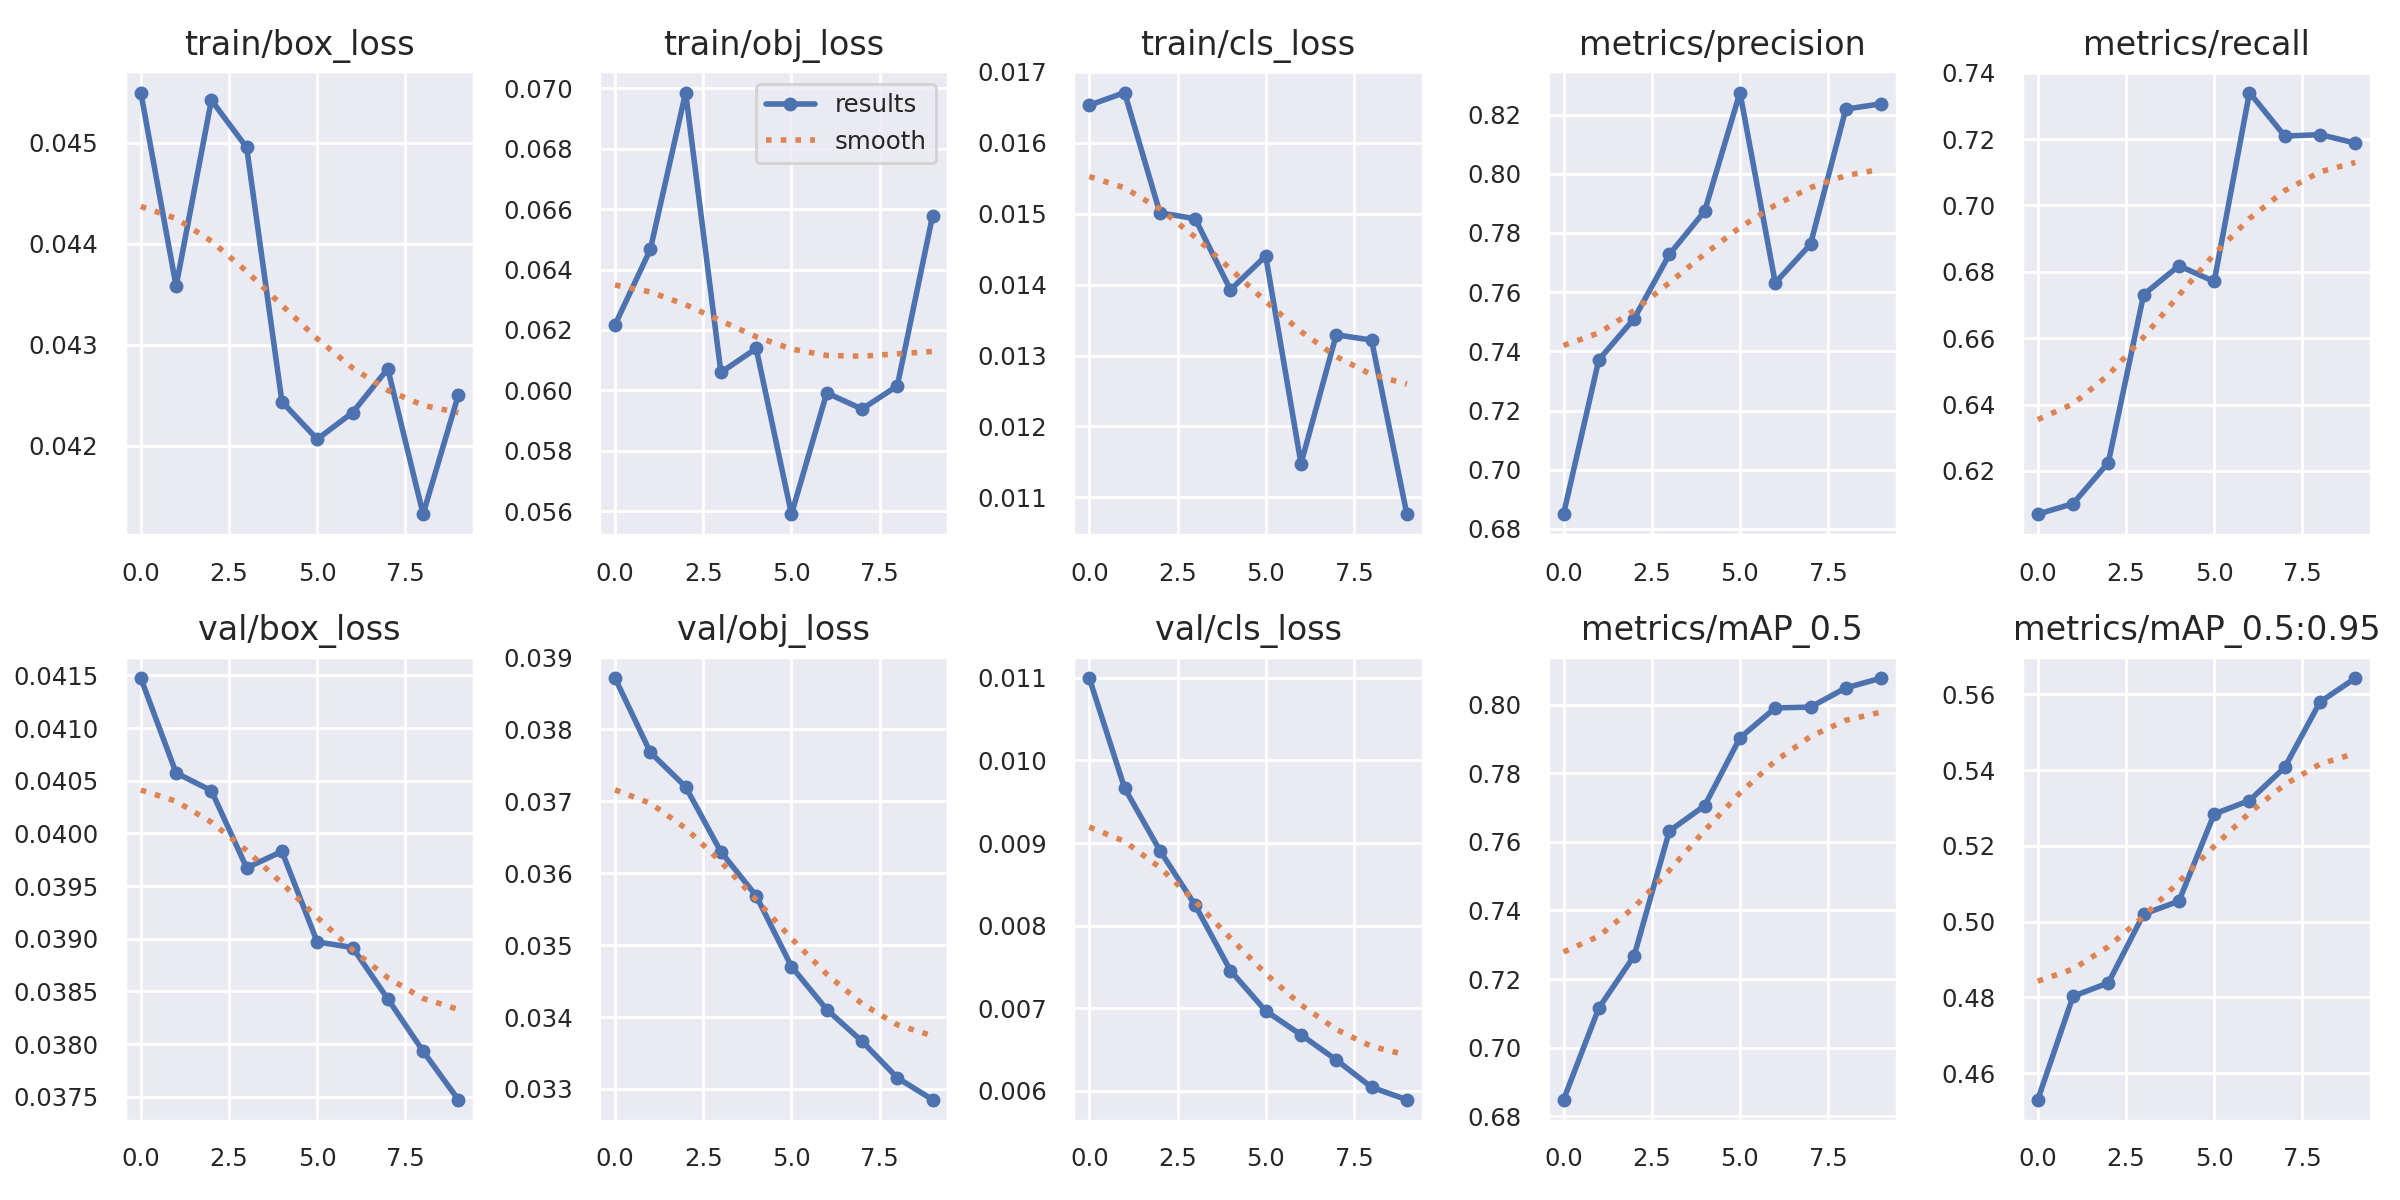

In [23]:
# Exibe os gráficos de desempenho gerados pelo YOLOv5 após o treinamento
# Esses gráficos incluem: perda (loss), precisão (precision), recall, F1-score etc.

from IPython.display import Image

# Caminho padrão do arquivo de resultados
Image(filename='runs/train/exp3/results.png', width=800)

**Conclusão**

Durante este projeto, realizamos o treinamento de um modelo YOLOv5 utilizando Transfer Learning com pesos pré-treinados (yolov5s.pt) e um subconjunto do dataset coco128.

**Resultados**:
- As métricas de perda (losses) — tanto para treino quanto validação — diminuíram ao longo das épocas, indicando que o modelo aprendeu progressivamente.
- A **precisão (precision)** e o **recall** aumentaram de forma consistente.
- A **mAP@ 0.5** alcançou ~0.80, o que é um ótimo resultado considerando o dataset reduzido.
- A **mAP@ 0.5:0.95**, mais exigente, também apresentou evolução contínua (~0.56 no final).

**Aprendizados**:
- O uso de pesos pré-treinados acelera e melhora o desempenho do modelo, especialmente em datasets pequenos.
- É importante configurar corretamente o arquivo `custom.yaml` com todas as classes reais para evitar erros de mapeamento.

**Possíveis melhorias**:
- Realizar mais épocas de treinamento (ex: 20 ou 30) para estabilizar melhor os gráficos.
- Ajustar a taxa de aprendizado ou testar outros otimizadores.
- Usar um dataset maior e mais balanceado, ou aplicar técnicas de data augmentation.

O modelo demonstrou bom desempenho e capacidade de generalização mesmo com poucas imagens. A próxima etapa seria validar as detecções visualmente e aplicar o modelo em novos conjuntos de imagens.

## Etapa 6: Visualizar Detecções em Imagens do Dataset

In [28]:
# Rodar inferência com imagens de teste usando o modelo treinado
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --source coco128/images/train2017 --conf 0.25 --save-txt --save-conf --exist-ok

# --weights: Caminho para o modelo treinado
# --img: Tamanho da imagem (igual ao do treino)
# --source: Pasta de imagens de entrada
# --conf: Confiança mínima
# --save-txt: Salva coordenadas
# --save-conf: Salva a confiança da detecção
# --exist-ok: Não dá erro se a pasta já existir


detect: weights=['runs/train/exp3/weights/best.pt'], source=coco128/images/train2017, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/128 /content/yolov5/yolov5/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 4 oranges, 1 broccoli, 395.3ms
image 2/128 /content/yolov5/yolov5/coco128/images/train2017/000000000025.jpg: 448x640 2 giraffes, 377.0ms
image 3/128 /content/yolov5/yolov5/coco128/images/train2017/000000000030.jpg: 448x640 1 potted plant, 1

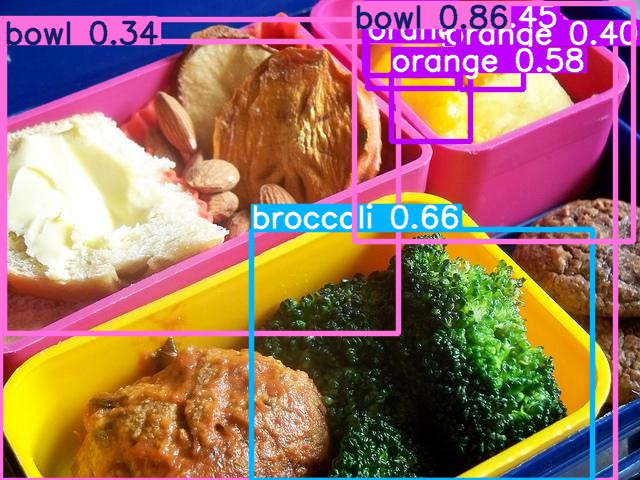

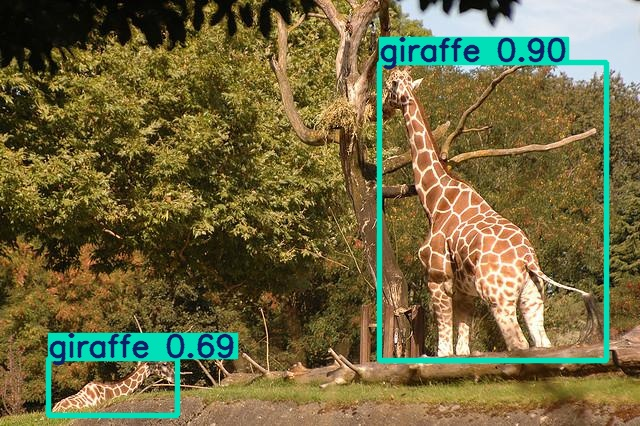

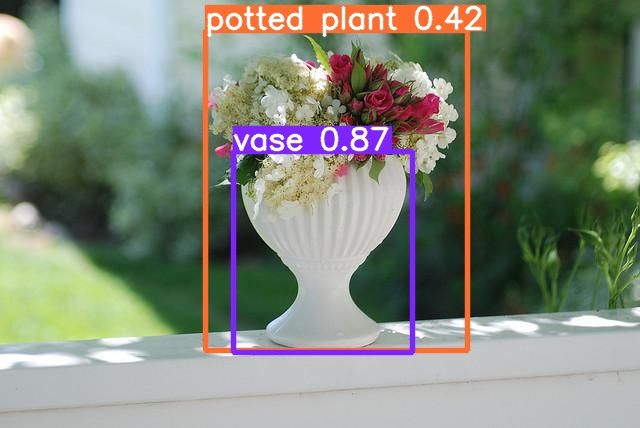

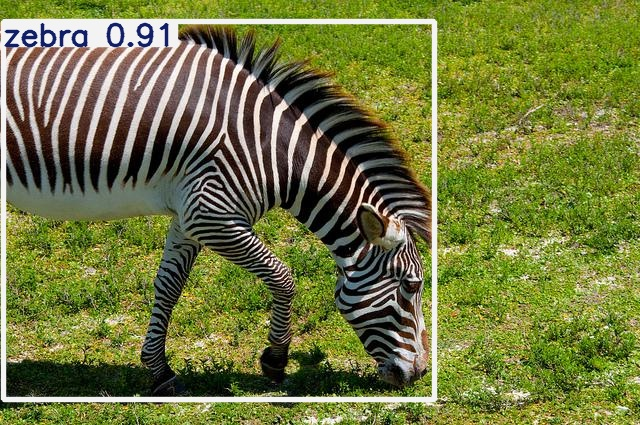

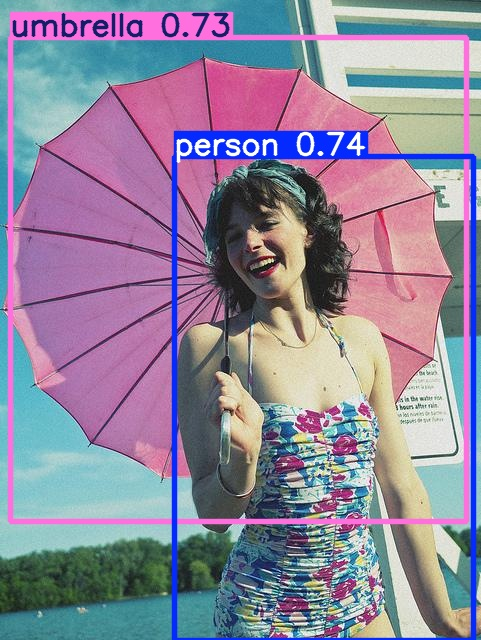

In [33]:
# Exibir imagens com predições visuais (sem depender dos arquivos .txt)

import glob
from IPython.display import Image, display

# Caminho para as imagens com bounding boxes geradas pela inferência
image_paths = sorted(glob.glob('runs/detect/exp/*.jpg'))

# Exibe até 5 imagens com predições
for img_path in image_paths[:5]:
    display(Image(filename=img_path, width=800))
